# Overview of the Perceptron

The perceptron is a supervised learning algorithm used for binary classification tasks. The perceptron works by finding a linear decision boundary to separate data points into two classes. It is effectivly one neuron of a larger neural network.

## Basic Functionality
1. **Input and Weights**: The perceptron takes a set of input features and assigns weights to them. These weights are adjusted during training to minimize classification errors.
2. **Weighted Sum**: It computes a weighted sum of the inputs and adds a bias term.
3. **Activation Function**: The weighted sum is passed through an activation function (1 if >0, -1 if <0) to produce the output, which lables each point as a 1 or a 0.
4. **Learning**: The perceptron updates its weights to minmize error so that the greatest number of points are properly classified.

The perceptron is a foundational concept in machine learning and serves as the building block for more complex neural network architectures. However, it is limited to solving linearly separable problems. If the datasets overlap then the perceptron will not converge to the best solution.

In this notebook we run it on a dataset about images of checks, with the checks labled as forged or real. The images were preprocessed and certain values from the image processing are associated with each check.

In [ ]:

# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))



import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [5]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class



D = pd.concat([banknote_df.iloc[:50], banknote_df.iloc[762:812]]) # reduces the data set size to 50 of each



# so our lable is the class column,
y = D['class'].to_numpy()
y = np.where(y == 0, -1, y)
X = D[['variance', 'entropy']].values

X[:, 0] = np.where(y == 1, X[:, 0] - 5, X[:, 0]) 
# the data is actually a little overlapping, so I had to separate the out more for this demonstration


In [6]:
# Instantiate one instance of the Perceptron class
clf = ml.Perceptron(eta = 0.2,epochs = 1000)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [7]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


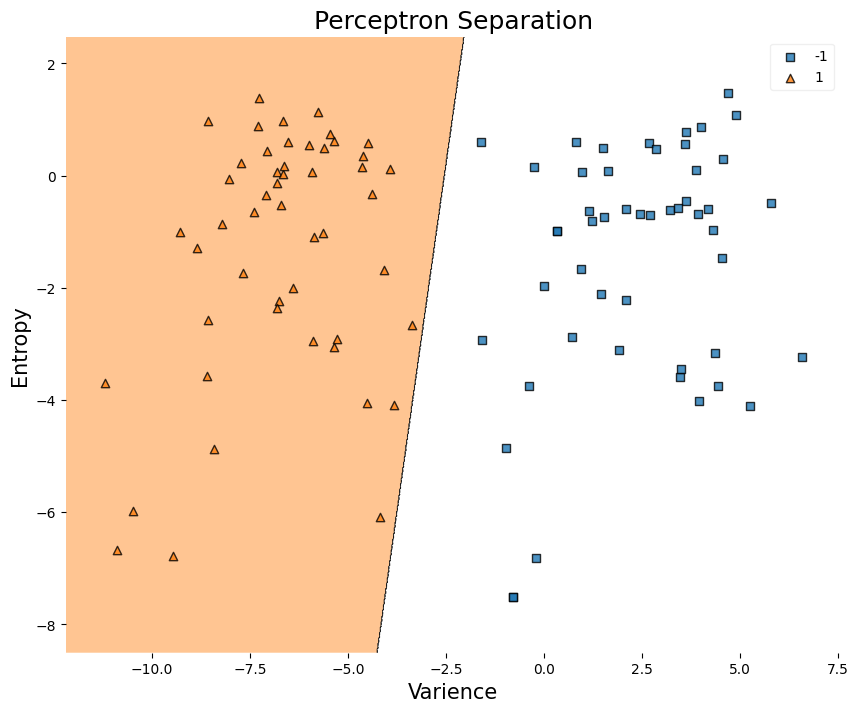

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("Perceptron Separation", fontsize = 18)
plt.xlabel("Varience", fontsize = 15)
plt.ylabel("Entropy", fontsize = 15)
plt.show()

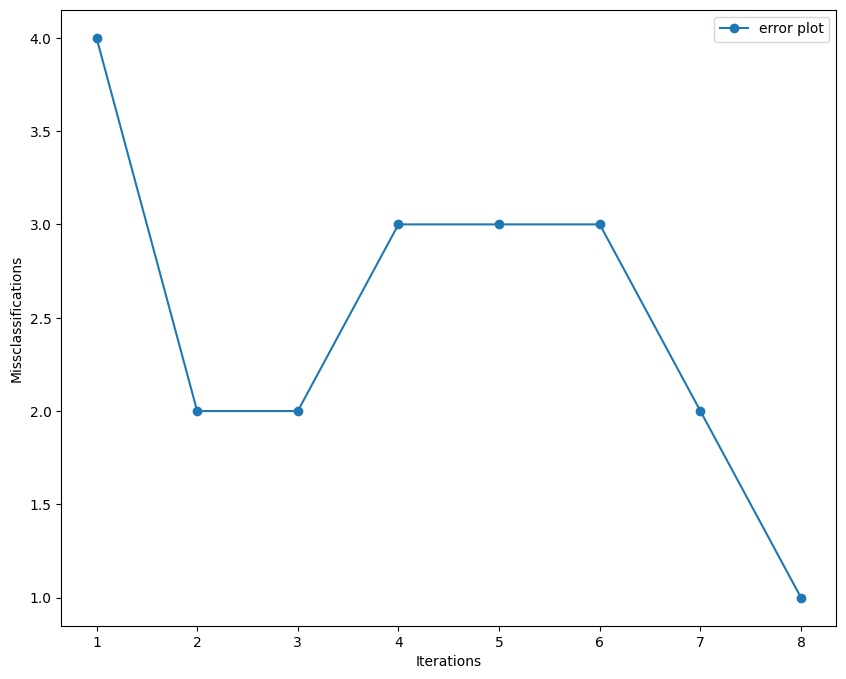

In [9]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()